# 12. Refinement of the analytical solution

## Numerical experiments - Week 15/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

In [1]:
using PyPlot
using CurveFit
using Revise

Revise.includet("./conversions.jl")
Revise.includet("./diffusion.jl")
Revise.includet("./setup.jl")
Revise.includet("./plotting.jl")
Revise.includet("./analysis.jl")
using .Conversions
using .Diffusion
using .Setup
using .Plotting
using .Analysis

## 1. Revisiting the inhibitor saturation in the vicinity of the spore

Previously, a formula was derived that computed the concentration in the spore over time, given that the spore volume is negligible:

$$
\begin{equation}
    c_{\textrm{in}}(t) = c_{\textrm{out}}+c_0e^{-\frac{t}{\tau}}=\left(1 + \lambda_{\textrm{acc}}\right)c_0e^{-\frac{t}{\tau}},
\end{equation}
$$

where, at a moderate spore density $\rho_s$, there is an accumulation term

$$
\begin{equation}
    \lambda_{\textrm{acc}}=\rho_s\frac{AP_s}{4\pi D^{3/2}}\int_0^{R_{\textrm{diff}}}{d{r}\ r^2\int_0^t{t'^{-3/2}e^{\left(\frac{t'}{\tau}-\frac{r^2}{4Dt'}\right)}dt'}}.
\end{equation}
$$

A more accurate solution, accouting for the volume of the measured spore with radius $R$, can be derived as follows. Starting with the permeation-driving concentration difference,

$$
\begin{equation}
\Delta{c}{(t)}=\Delta{c}{(0)}e^{-t/\tau},
\tag{2}
\end{equation}
$$

the time-dependent flux per area through the spore interface is

$$
\begin{equation}
j{(t)}=-P_s\Delta{c}{(0)}e^{-t/\tau}.
\end{equation}
$$

Since the sphere has area $4\pi R^2$, the total source strength is

$$
\begin{equation}
Q{(t)}=4\pi R^2P_s\Delta{c}{(0)}e^{-t/\tau}.
\end{equation}
$$

At measurement points with a distance to the spore centre $r>R$, the diffusion equation applies:

$$
\begin{equation}
\frac{\partial{c}}{\partial{t}}=D\left[\frac{1}{r^2}\frac{\partial}{\partial{r}}\left(r^2\frac{\partial{c}}{\partial{r}}\right)\right],
\end{equation}
$$

with the condition $c{(r,t)}\to 0$ as $r\to\infty$. At the spore surface, free diffusion back into the conidium is prohibited, except for uptake due to reverse permeation. The concentration at this boundary is either added or removed using the permeation law, which can be modelled via the Robin boundary condition

$$
\begin{equation}
D\frac{\partial{c}}{\partial{r}}|_{r=R}+P_sc{(R,t)}=-P_s\Delta{c}{(0)}e^{-t/\tau}.
\end{equation}
$$

Taking the Laplace transform of the concentration,

$$
\begin{equation}
\tilde{c}{(r,s)}=\int_0^\infty{e^{-st}c{(r,t)}\ d{t}},
\end{equation}
$$

the homogeneous part of the spherically symmetric diffusion equation becomes

$$
\begin{equation}
D\left[\frac{d^2\tilde{c}}{dr^2}+\frac{2}{r}\frac{d{\tilde{c}}}{d{r}}\right]-s\tilde{c}=0.
\end{equation}
$$

Its general solution for $r>R$, centered at $r=R$, can be expressed as

$$
\begin{equation}
\tilde{c}{(r,s)}=\frac{A{(s)}}{r}\exp{\left[-\sqrt{\frac{s}{D}}(r-R)\right]},
\tag{3}
\end{equation}
$$

where $A{(s)}$ is the Laplace-domain amplitude. The boundary condition at $r=R$ is Laplace-transformed to

$$
\begin{equation}
D\frac{d{\tilde{c}}}{d{r}}|_{r=R}+P_s\tilde{c}{(R,s)}=\frac{P_s\Delta{c}{(0)}}{s+1/\tau},
\tag{4}
\end{equation}
$$

where the Laplace transform of $e^{-t/\tau}$ to $\frac{1}{s+1/\tau}$ is used. Differentiating the general solution,

$$
\begin{equation}
\frac{d{\tilde{c}}}{d{r}}=-\frac{A{(s)}}{r^2}\exp{\left[-\sqrt{\frac{s}{D}}(r-R)\right]}-\frac{A{(s)}}{r}\sqrt{\frac{s}{D}}\exp{\left[-\sqrt{\frac{s}{D}}(r-R)\right]}.
\end{equation}
$$

Evaluating the Laplace-transformed concentration and its derivative at $r=R$,

$$
\begin{equation}
\tilde{c}{(R,s)}=\frac{A{(s)}}{R},
\end{equation}
$$

$$
\begin{equation}
\frac{d{\tilde{c}}}{d{r}}|_{r=R}=-\frac{A{(s)}}{R^2}-\frac{A{(s)}}{R}\sqrt{\frac{s}{D}}.
\end{equation}
$$

These equations can be plugged into Equation 4, yielding

$$
\begin{equation}
D\left[-\frac{A{(s)}}{R^2}-\frac{A{(s)}}{R}\sqrt{\frac{s}{D}}\right]+P_s\frac{A{(s)}}{R}=\frac{P_s\Delta{c}{(0)}}{s+1/\tau}.
\end{equation}
$$

From this, the constant $A{(s)}$ can be expressed as

$$
\begin{equation}
A{(s)}=\frac{P_sR\Delta{c}{(0)}}{(s+1/\tau)\left(P_s-\sqrt{Ds}-\frac{D}{R}\right)}.
\end{equation}
$$

This can be plugged into Equation 3, rearranging the terms to find

$$
\begin{equation}
\tilde{c}{(r,s)}=\frac{R^2P_s\Delta{c}{(0)}}{Dr(s+1/\tau)}\frac{e^{-\sqrt{s/D}(r-R)}}{1+P_s/\sqrt{Ds}}.
\end{equation}
$$

Performing an inverse transform, the full time-domain solution can be written as

$$
\begin{equation}
c{(r,t)}=\frac{R^2P_s\Delta{c}{(0)}}{Dr}\mathcal{L}^{-1}\left\{\frac{e^{-\sqrt{s/D}(r-R)}}{1+P_s/\sqrt{Ds}}\right\}{(t)}.
\end{equation}
$$

Using the convolution theorem, one can express the inverse Laplace transform as a convolution integral:

$$
\begin{equation}
c{(r,t)}=\frac{R^2P_s\Delta{c}{(0)}}{r}\int_0^t{e^{-t'/\tau}g{(r-R, t-t')}\ d{t'}},
\end{equation}
$$

where

$$
\begin{equation}
g{(r-R, t-t')}=\frac{1}{\sqrt{4\pi D(t-t')}}\left[e^{-\frac{(r-R)^2}{4D(t-t')}}-\frac{P_s}{D}e^{\frac{P_s(r-R)}{D}+\frac{P_s^2(t-t')}{D^2}}\textrm{erfc}{\left(\frac{r-R}{2\sqrt{D(t-t')}}+\frac{P_s\sqrt{t-t'}}{D}\right)}\right].
\end{equation}
$$

Evaluated just outside the spore surface ($r=R^+$), the solution becomes

$$
\begin{equation}
c{(R,t)}=RP_s\Delta{c}{(0)}\int_0^t{e^{-t'/\tau}\frac{1}{\sqrt{4\pi D(t-t')}}\left[1-\frac{P_s}{D}e^{\frac{P_s^2(t-t')}{D^2}}\textrm{erfc}{\left(\frac{P_s\sqrt{t-t'}}{D}\right)}\right]\ d{t'}}.
\end{equation}
$$

This is the component of the immediately adjacent outside concentration arising from the release of the spore itself. Adding the effect of the remaining spores in the vicinity, the previous accumulation integral can be used with a slight modification of its lower bound in the spatial integral, to obtain the "background" contribution to the outside concentration:

$$
\begin{equation}
    c_{\textrm{bg}}{(t)}=\Delta{c}{(0)}e^{-\frac{t}{\tau}}\rho_s\frac{AP_s}{4\pi D^{3/2}}\int_{R}^{R_{\textrm{diff}}}{d{r}\ r^2\int_0^t{t'^{-3/2}e^{\left(\frac{t'}{\tau}-\frac{r^2}{4Dt'}\right)}dt'}}.
\end{equation}
$$

Summing all the components yields the cumulative outside concentration

$$
\begin{equation}
c_{\textrm{out}}=c{(R,t)}+c_{\textrm{bg}}{(t)}.
\end{equation}
$$

Thus, the concentration drop across the spore surface can be expressed as

$$
\begin{equation}
\Delta{c}{(t)}=c_{\textrm{in}}{(t)}-c_{\textrm{out}}{(t)}=c_{\textrm{in}}{(t)}-c{(R,t)}-c_{\textrm{bg}}.
\end{equation}
$$

This formula can be plugged into Equation 2, rearranging it to

$$
\begin{equation}
c_{\textrm{in}}{(t)}=c{(R,t)}+c_{\textrm{bg}}+\Delta{c}{(0)}e^{-t/\tau}.
\end{equation}
$$

## 2. Numerical tests

This solution is implemented and tested against its simplified counterpart in the following code.

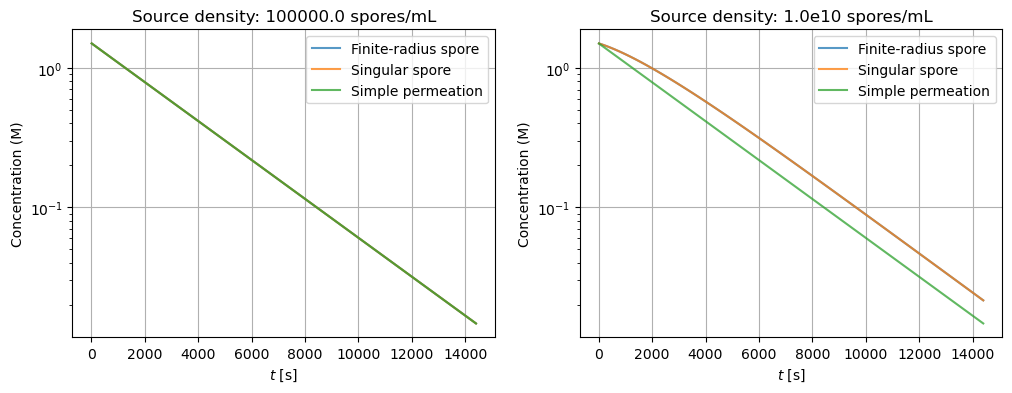

In [58]:
# Global parameters
D = 600 # microns^2/s
Ps_fit = 0.0002675353069511818 # microns/s
t_max = 14400#3600 # s
c0_spore = 1.5 # x10^(-5) M
spore_diameter = 5 # microns
spore_rad = spore_diameter / 2 # microns
K = 1#316.23 # partition coefficient, set to 1 since we don't necessarily deal with lipid membranes
n_save_frames = 100

A, V = compute_spore_area_and_volume_from_dia(spore_diameter)
times = collect(LinRange(10, t_max, n_save_frames)) # s

# Simple permeation solution
c_vals_perm = permeation_time_dependent_analytical(c0_spore, 0, times, Ps_fit, A, V)

src_densities = [1e5, 1e10]
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for (i, src_density) in enumerate(src_densities)
    # New scheme
    test_r = 1.0 * spore_rad
    c_vals_new = slow_release_shell_src_at_src(src_density, c0_spore, times, D, Ps_fit, spore_diameter, discrete=false)

    # Singular spore scheme
    test_pt = [test_r, 0.0, 0.0]
    c_vals_old = slow_release_pt_src_grid_at_src(src_density, c0_spore, times, D, Ps_fit, A, V; discrete=false)

    
    axs[i].plot(times, c_vals_new, label="Finite-radius spore", alpha=0.75)
    axs[i].plot(times, c_vals_old, label="Singular spore", alpha=0.75)
    axs[i].plot(times, c_vals_perm, label="Simple permeation", alpha=0.75)
    axs[i].set_xlabel(L"t\ \text{[s]}")
    axs[i].set_ylabel("Concentration (M)")
    axs[i].grid()
    axs[i].legend()
    axs[i].set_yscale("log")
    axs[i].set_title("Source density: " * string(src_density) * " spores/mL")
end
gcf()

The results show that, for lower spore densities, the newly derived analytical solution is very closely aligned with both the solution for simple permeation and the previously derived singular-spore solution. On the other hand, once the spore density increases significantly, the two integration-based solutions exhibit the same deviation from the simple permeation scheme, suggesting that they can be used with equal success.

Furthermore, the deviation between the analytical schemes only appears for densities above $10^8$ spores/mL, which is the limit of the naturally and experimentally relevant scenarios.